# Saketh Bobbala
## 210968188
## Week 5

In [18]:
# Importing relevant libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, SimpleRNN
from tensorflow import keras
from matplotlib import pyplot as plt

In [2]:
#Generating random sequence data
def generate_time_series(sample_size, n_steps):
 freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
 time = np.linspace(0, 1, n_steps)
 series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) 
 series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) 
 series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5) 
 return series[..., np.newaxis].astype(np.float32)

In [3]:
data=generate_time_series(10000, 51)

In [4]:
data

array([[[ 4.2151323e-01],
        [ 1.4760588e-01],
        [-1.6927324e-01],
        ...,
        [ 2.1487601e-01],
        [ 1.5716417e-01],
        [ 1.1823841e-01]],

       [[-4.4741043e-01],
        [-5.7518280e-01],
        [-5.1948667e-01],
        ...,
        [ 6.1200763e-04],
        [-7.2532453e-02],
        [-2.0529464e-01]],

       [[-3.8322492e-03],
        [ 6.1237086e-02],
        [ 2.4601141e-02],
        ...,
        [-4.1141641e-01],
        [-4.0051126e-01],
        [-2.3896287e-01]],

       ...,

       [[-4.8008987e-01],
        [-6.6073674e-01],
        [-6.7663598e-01],
        ...,
        [ 1.2636997e-01],
        [ 1.0235280e-01],
        [ 3.8839482e-02]],

       [[-6.8500680e-01],
        [-6.5779239e-01],
        [-4.7730461e-01],
        ...,
        [-5.6420392e-01],
        [-4.5292908e-01],
        [-3.2536054e-01]],

       [[-1.0424310e-01],
        [-2.1675964e-01],
        [-2.5872865e-01],
        ...,
        [ 1.5154657e-01],
        [ 3.853

In [5]:
#Splitting data into train, test, validation sets
x_train, x_temp, y_train, y_temp = train_test_split(data[:, :50, :], data[:, -1, :], test_size=0.3, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.3333, random_state=42)

In [6]:
#Defining a fully connected network
fcnn_model = Sequential([Flatten(input_shape=(50, 1)),
                         Dense(16, activation='relu'),
                         Dense(1)])

2023-08-31 15:23:29.240018: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-31 15:23:29.292979: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-31 15:23:29.293409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
#Compiling and training the model
fcnn_model.compile(optimizer='adam', loss='mean_squared_error')
history=fcnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10


2023-08-31 15:23:33.750294: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-31 15:23:33.754263: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ff3640330c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-31 15:23:33.754323: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-08-31 15:23:33.766076: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-31 15:23:34.104040: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-31 15:23:34.369983: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

219/219 [==============================] - 5s 6ms/step - loss: 0.0635 - val_loss: 0.0243
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0160 - val_loss: 0.0120
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0095 - val_loss: 0.0082
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0057 - val_loss: 0.0053
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0050 - val_loss: 0.0047
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 8/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 9/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0038


In [8]:
#Calculating the loss 
loss= fcnn_model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0040


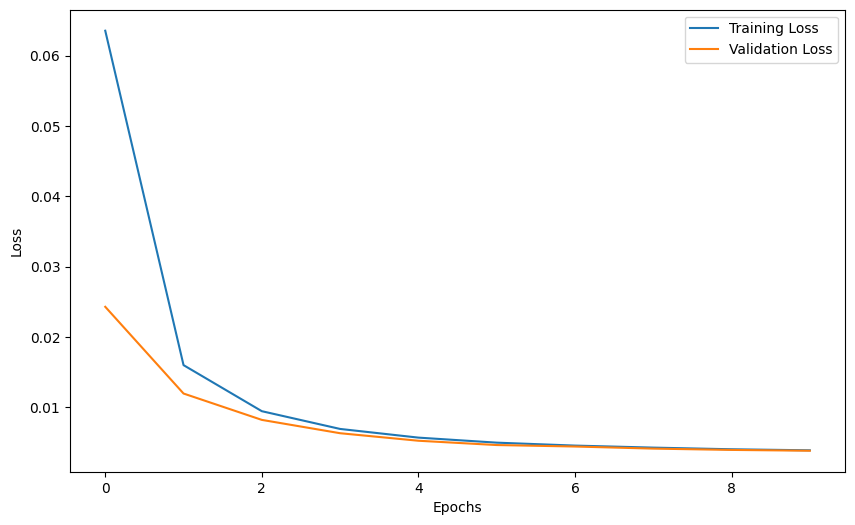

In [9]:
#Plot for training Loss and validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
#Defining a RNN
rnn1_model = Sequential([
    SimpleRNN(1, input_shape=(50, 1)),
    Dense(1)
])

In [11]:
#Compiling and training the model
rnn1_model.compile(optimizer='adam', loss='mean_squared_error')
history=rnn1_model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 9s 28ms/step - loss: 0.1406 - val_loss: 0.1378
Epoch 2/10
219/219 [==============================] - 6s 28ms/step - loss: 0.1409 - val_loss: 0.1375
Epoch 3/10
219/219 [==============================] - 6s 27ms/step - loss: 0.1411 - val_loss: 0.1385
Epoch 4/10
219/219 [==============================] - 6s 28ms/step - loss: 0.1412 - val_loss: 0.1403
Epoch 5/10
219/219 [==============================] - 6s 28ms/step - loss: 0.1404 - val_loss: 0.1384
Epoch 6/10
219/219 [==============================] - 6s 27ms/step - loss: 0.1408 - val_loss: 0.1387
Epoch 7/10
219/219 [==============================] - 6s 27ms/step - loss: 0.1405 - val_loss: 0.1384
Epoch 8/10
219/219 [==============================] - 6s 28ms/step - loss: 0.1407 - val_loss: 0.1387
Epoch 9/10
219/219 [==============================] - 6s 28ms/step - loss: 0.1407 - val_loss: 0.1379
Epoch 10/10
219/219 [==============================] - 6s 27ms/step - loss: 0.1407 - val_lo

In [12]:
loss = rnn1_model.evaluate(x_test, y_test)
loss

32/32 [==============================] - 0s 11ms/step - loss: 0.1435


0.14346182346343994

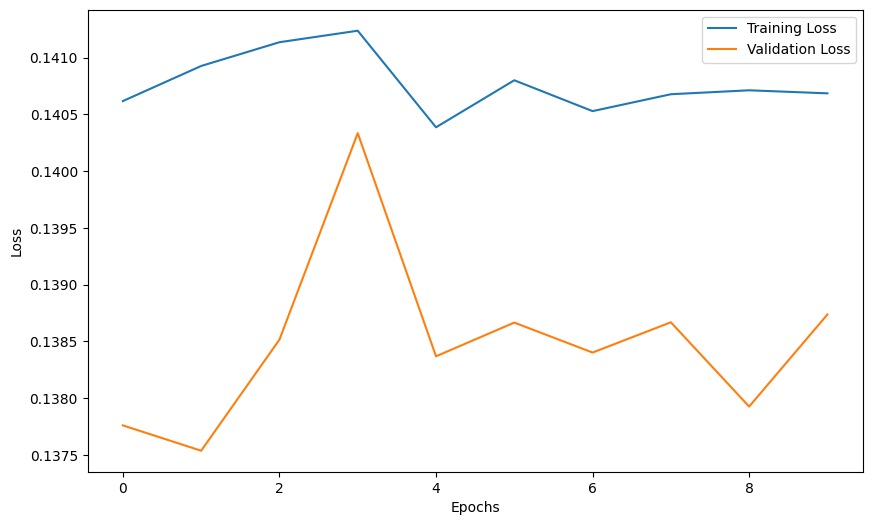

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
rnn2_model = Sequential([
    SimpleRNN(32, input_shape=(50, 1), return_sequences=True),
    SimpleRNN(1),
    Dense(1)])


In [15]:
#Compiling and training the model
rnn2_model.compile(optimizer='adam', loss='mean_squared_error')
history=rnn2_model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 20s 72ms/step - loss: 0.0215 - val_loss: 0.0083
Epoch 2/10
219/219 [==============================] - 15s 70ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 3/10
219/219 [==============================] - 15s 70ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 4/10
219/219 [==============================] - 15s 70ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 5/10
219/219 [==============================] - 15s 70ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 6/10
219/219 [==============================] - 15s 70ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 7/10
219/219 [==============================] - 15s 71ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 8/10
219/219 [==============================] - 15s 70ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 9/10
219/219 [==============================] - 15s 70ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 10/10
219/219 [==============================] - 15s 69ms/step - loss: 0.003

In [18]:
loss = rnn2_model.evaluate(x_test, y_test)
loss

32/32 [==============================] - 1s 17ms/step - loss: 0.0034


0.003442804329097271

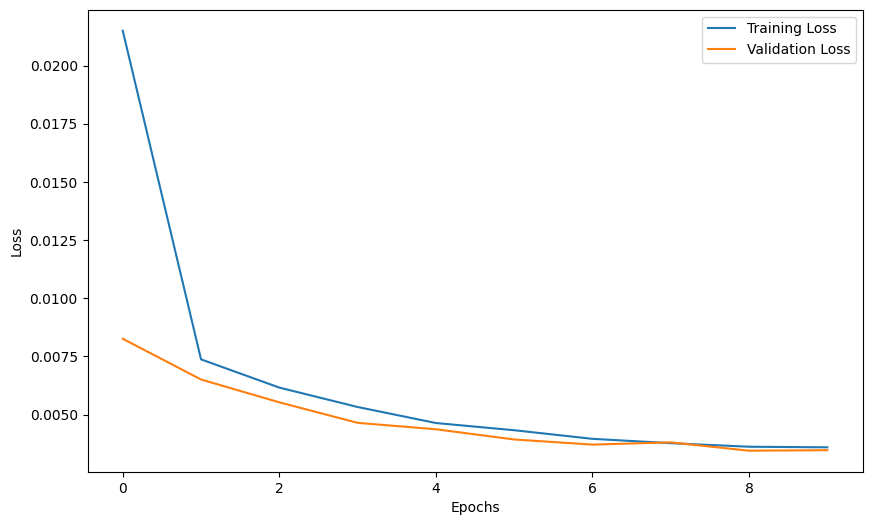

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
rnn3_model = Sequential([
    SimpleRNN(32, input_shape=(50, 1), return_sequences=True),
    SimpleRNN(32, return_sequences=True),
    SimpleRNN(1),
    Dense(1)
])

In [21]:
#Compiling and training the model
rnn3_model.compile(optimizer='adam', loss='mean_squared_error')
history=rnn3_model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 31s 113ms/step - loss: 0.0304 - val_loss: 0.0172
Epoch 2/10
219/219 [==============================] - 24s 109ms/step - loss: 0.0117 - val_loss: 0.0085
Epoch 3/10
219/219 [==============================] - 24s 108ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 4/10
219/219 [==============================] - 23s 107ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 5/10
219/219 [==============================] - 24s 107ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 6/10
219/219 [==============================] - 24s 108ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 7/10
219/219 [==============================] - 24s 108ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 8/10
219/219 [==============================] - 24s 108ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 9/10
219/219 [==============================] - 23s 107ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/10
219/219 [==============================] - 23s 107ms/step - l

In [22]:
loss = rnn3_model.evaluate(x_test, y_test)
loss

32/32 [==============================] - 1s 22ms/step - loss: 0.0027


0.0026852809824049473

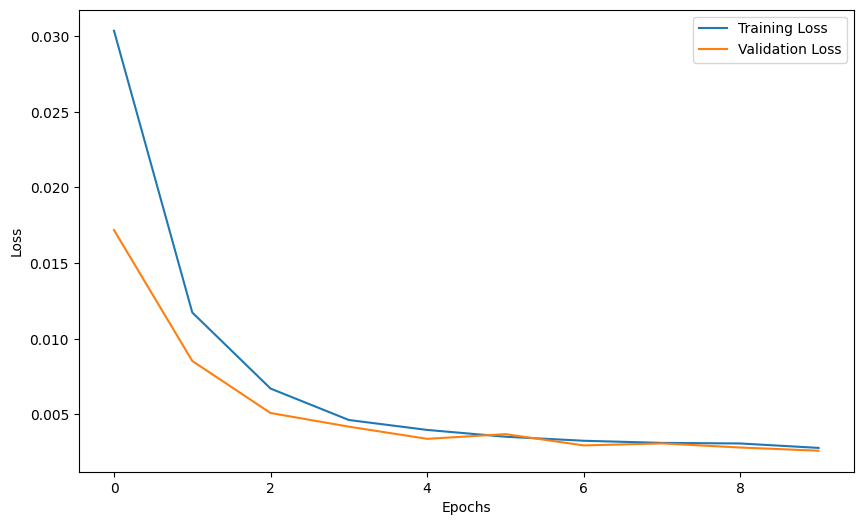

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Google Stock Prediction  

In [31]:
#Reading the data
df = pd.read_csv('GOOG.csv')

In [32]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [33]:
# Changing the data type of 'date' from object to datetime and setting it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [9]:
#Splitting the dataset into train and test 
train = df[data.index.year < 2020]
test = df[(data.index.year >= 2020) & (data.index.year <= 2021)]

In [10]:
# Selecting the closing price
train_close = train['close'].values
test_close = test['close'].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [13]:
#Normalising the data 
scaler = MinMaxScaler()
train_close = scaler.fit_transform(train_close.reshape(-1, 1))
test_close = scaler.transform(test_close.reshape(-1, 1))

In [15]:
#Creating sequences for the data
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

In [16]:
seq_length = 50 
X_train = create_sequences(train_close, seq_length)
X_test = create_sequences(test_close, seq_length)
y_train = train_close[seq_length:]
y_test = test_close[seq_length:]

In [35]:
#Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(1)
])

In [36]:
# Compiling and training the Model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/5
22/22 - 23s - loss: 0.2287 - val_loss: 0.0071 - 23s/epoch - 1s/step
Epoch 2/5
22/22 - 3s - loss: 0.0667 - val_loss: 0.0085 - 3s/epoch - 128ms/step
Epoch 3/5
22/22 - 3s - loss: 0.0369 - val_loss: 0.0328 - 3s/epoch - 125ms/step
Epoch 4/5
22/22 - 3s - loss: 0.0233 - val_loss: 0.0097 - 3s/epoch - 133ms/step
Epoch 5/5
22/22 - 3s - loss: 0.0180 - val_loss: 0.0105 - 3s/epoch - 145ms/step


In [37]:
#Making predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

10/10 [==============================] - 3s 37ms/step


In [38]:
# Calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [26]:
#MAPE
mape(y_test_actual, y_pred)

21.983123562684284

In [27]:
#MSE
mean_squared_error(y_test_actual, y_pred)

281723.1590816367

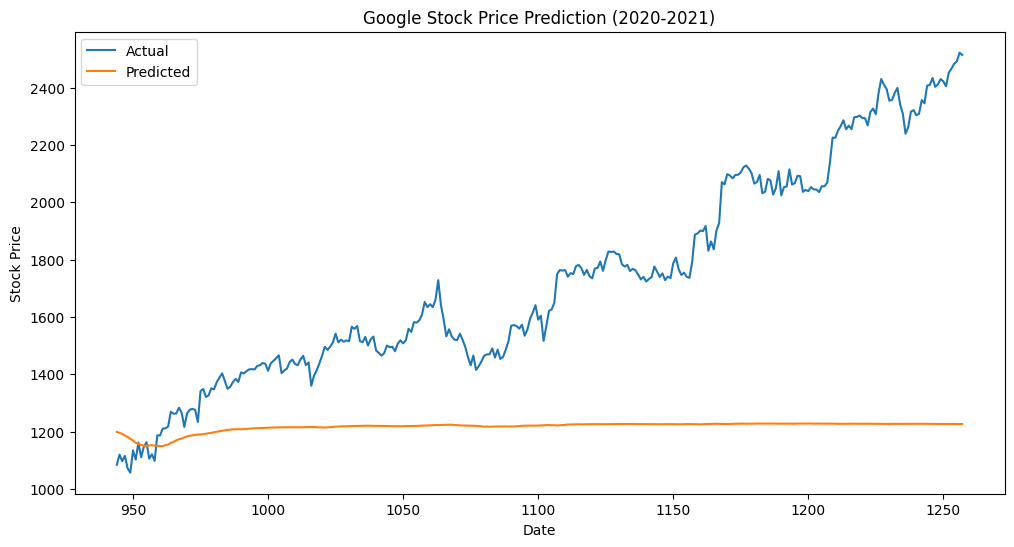

In [39]:
#Plot of actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index[seq_length:], y_test_actual, label='Actual')
plt.plot(test.index[seq_length:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Prediction (2020-2021)')
plt.legend()
plt.show()

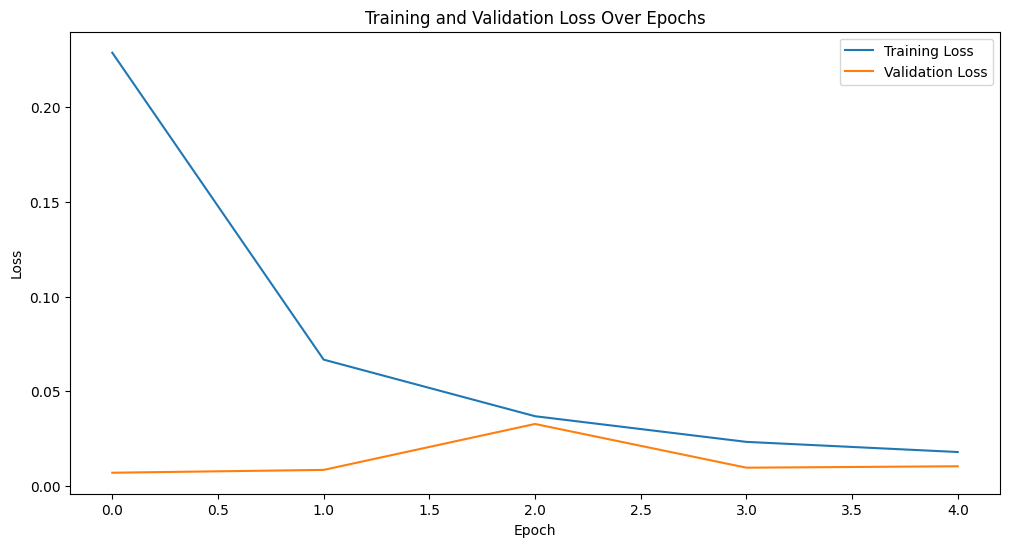

In [40]:
#Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()